In [ ]:
#/dtu/3d-imaging-center/projects/2023_DANFIX_103_ECECPMI

In [26]:
import os
import numpy as np
import matplotlib.pyplot as plt

from cil.io import NikonDataReader, ZEISSDataReader, RAWFileWriter, TIFFStackReader, TIFFWriter
from cil.utilities.jupyter import islicer
from cil.utilities.display import show_geometry, show2D
from cil.recon import FDK
from cil.plugins.tigre import FBP, ProjectionOperator
from cil.processors import TransmissionAbsorptionConverter, Slicer
from cil.optimisation.algorithms import CGLS, SIRT

In [3]:
path = "/dtu/3d-imaging-center/projects/2023_DANFIX_103_ECECPMI/raw_data_3DIM/S-P/S-P_2023-09-14_090625/LFOV-70kV-LE6-4s-15micro/S-P_LFOV-70kV-LE6-4s-15micro.txrm"
reader = ZEISSDataReader(file_name=path)

In [4]:
data = reader.read()

In [5]:
print(type(data))
print(data)

<class 'cil.framework.framework.AcquisitionData'>
Number of dimensions: 3
Shape: (1601, 1024, 1024)
Axis labels: ('angle', 'vertical', 'horizontal')



3D Cone-beam tomography
System configuration:
	Source position: [  0.        , -45.01095581,   0.        ]
	Rotation axis position: [0., 0., 0.]
	Rotation axis direction: [0., 0., 1.]
	Detector position: [  0.        , 160.00486755,   0.        ]
	Detector direction x: [1., 0., 0.]
	Detector direction y: [0., 0., 1.]
Panel configuration:
	Number of pixels: [1024 1024]
	Pixel size: [0.0675 0.0675]
	Pixel origin: bottom-left
Channel configuration:
	Number of channels: 1
Acquisition description:
	Number of positions: 1601
	Angles 0-20 in radians:
[-3.1415842, -3.1376586, -3.1336682, -3.129773 , -3.1258385, -3.1218832,
 -3.1180594, -3.1140218, -3.110174 , -3.1062222, -3.1023185, -3.0983927,
 -3.0945323, -3.090477 , -3.086624 , -3.082761 , -3.0788724, -3.0748618,
 -3.070967 , -3.0668266]
Distances in units: units distance
Number of channels: 1
channel_spacing: 1.0
voxel_num : x1024,y1024,z1024
voxel_size : x0.014819536209106445,y0.014819536209106445,z0.014819536209106445
center : x0,y0,z0



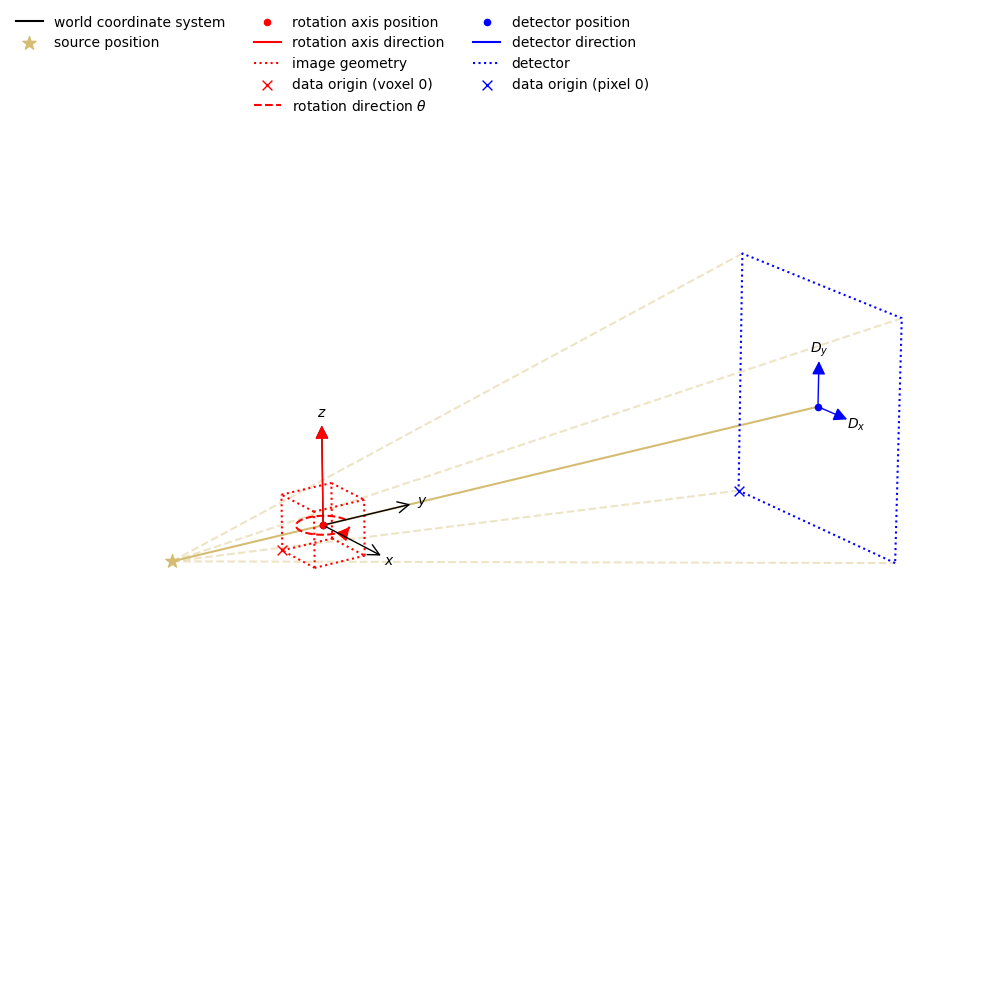

In [6]:
ag = data.geometry
ig = ag.get_ImageGeometry()
print(ag)
print(ig)
show_geometry(ag, ig)

In [10]:
islicer(data, origin='upper-right',direction=0)

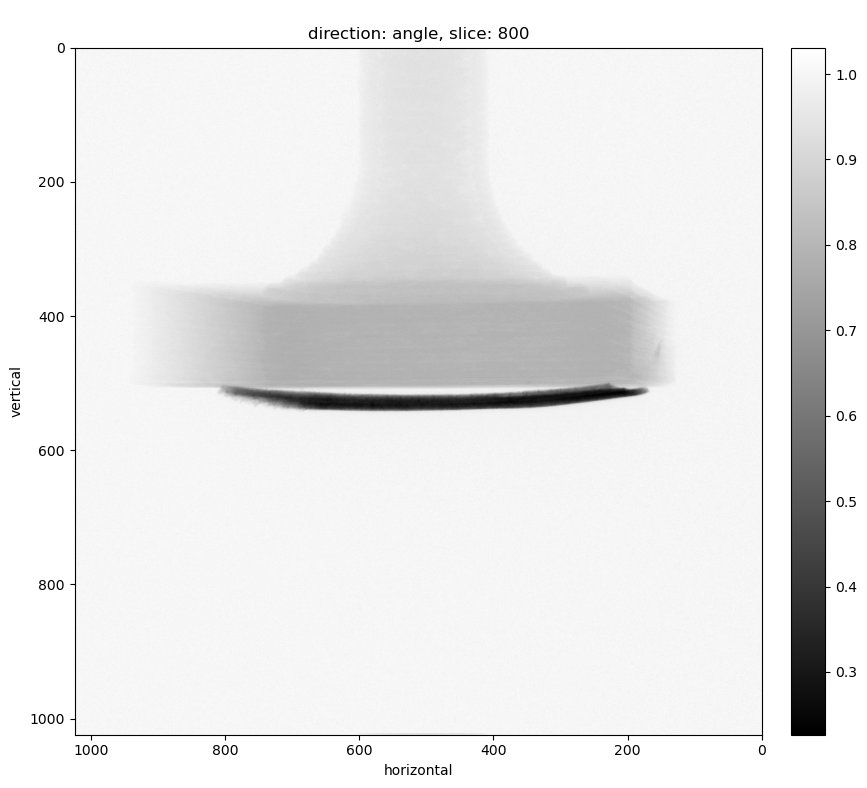

In [11]:
show2D(data, origin='upper-right')

In [15]:
data = TransmissionAbsorptionConverter()(data)

In [16]:
recon = FDK(data).run()

FDK recon

Input Data:
	angle: 1601
	vertical: 1024
	horizontal: 1024

Reconstruction Volume:
	vertical: 1024
	horizontal_y: 1024
	horizontal_x: 1024

Reconstruction Options:
	Backend: tigre
	Filter: ram-lak
	Filter cut-off frequency: 1.0
	FFT order: 11
	Filter_inplace: False



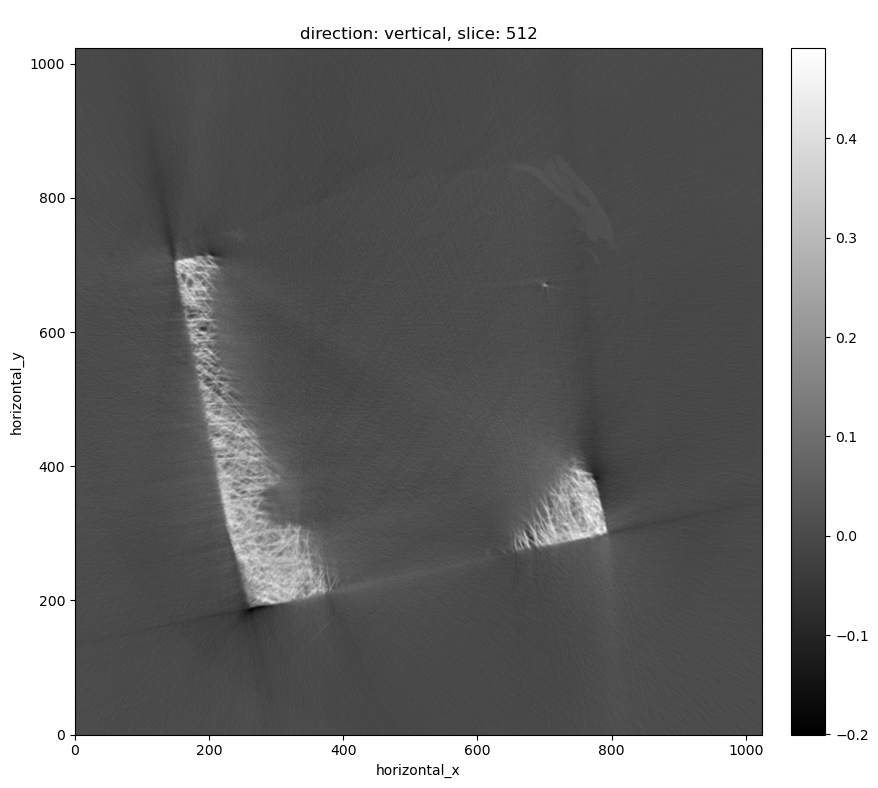

In [17]:
show2D(recon)

In [22]:
islicer(recon,size=(10,10),direction=0)

In [23]:
recon_trunc = Slicer(roi={'vertical':(450,580,1)})(recon)

In [24]:
islicer(recon_trunc,size=(10,10),direction=0)

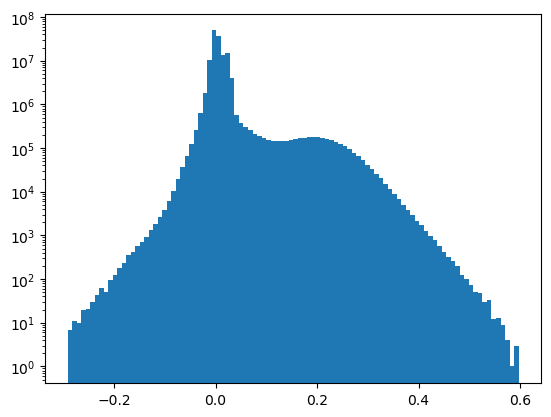

In [28]:
plt.hist(recon_trunc.as_array().flatten(),bins=100)
plt.yscale('log')